In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [12]:
NVDA_stock_data=pd.read_csv("NVDA (1).csv", index_col='Date')

In [13]:
NVDA_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in NVDA_stock_data.index.values]

In [14]:
NVDA_stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-22,46.337502,47.275002,46.020000,47.117500,46.797504,27993600
2019-04-23,47.250000,47.982498,47.152500,47.667500,47.343765,34685600
2019-04-24,47.772499,48.202499,47.160000,47.792500,47.467915,31820400
2019-04-25,47.387501,47.612499,45.924999,46.727501,46.410149,49929600
2019-04-26,45.177502,45.222500,43.325001,44.522499,44.220123,86898800
...,...,...,...,...,...,...
2024-04-16,864.330017,881.179993,860.640015,874.150024,874.150024,37045300
2024-04-17,883.400024,887.750000,839.500000,840.349976,840.349976,49540000
2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000


In [15]:
y = NVDA_stock_data['Close']
X = NVDA_stock_data[['Open', 'High', 'Low']]

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y= y.values.reshape(-1,1)
y_scaled =scaler.fit_transform(y)


In [17]:

y_scaled

array([[-0.94272989],
       [-0.93974445],
       [-0.93906594],
       ...,
       [ 3.39751814],
       [ 2.93770581],
       [ 2.98586904]])

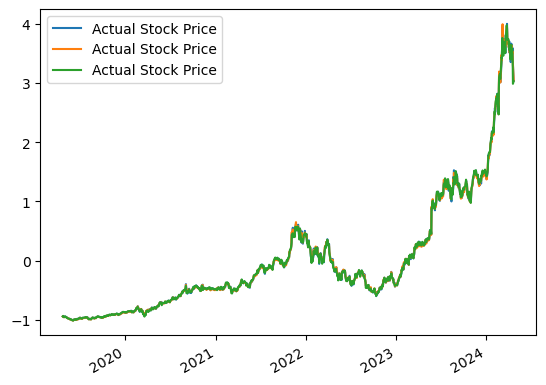

In [18]:
# Plot actual test data (y_test)
plt.plot(NVDA_dates[-len(X_scaled):], X_scaled, label="Actual Stock Price")

# Plot predicted test data (y_pred)
#plt.plot(NVDA_dates[-len(y_pred):], y_pred, label="Predicted Stock Price", linestyle='--')

# Customize the plot
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)


In [20]:
# Calculate the index that divides the data into training and testing sets
split_index = int(len(X_scaled) * 0.8)

# Split the data based on the calculated index
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

In [21]:
# Create the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [22]:
# Make predictions on the test data
y_pred = knn.predict(X_test)


In [23]:
y_pred

array([[0.26626071],
       [0.28753878],
       [0.24599587],
       [0.28073557],
       [0.25620068],
       [0.30492663],
       [0.33720563],
       [0.3240335 ],
       [0.3068446 ],
       [0.28949286],
       [0.32385256],
       [0.35497354],
       [0.3514091 ],
       [0.3514091 ],
       [0.3514091 ],
       [0.3240335 ],
       [0.35497354],
       [0.39863331],
       [0.40527362],
       [0.49197815],
       [0.50885944],
       [0.48325703],
       [0.45389118],
       [0.44623752],
       [0.53970903],
       [0.57482868],
       [0.53970903],
       [0.53970903],
       [0.57482868],
       [0.53970903],
       [0.57482868],
       [0.53970903],
       [0.53970903],
       [0.57482868],
       [0.57482868],
       [0.53970903],
       [0.57482868],
       [0.57482868],
       [0.53970903],
       [0.53970903],
       [0.57482868],
       [0.53970903],
       [0.57482868],
       [0.53970903],
       [0.53970903],
       [0.57482868],
       [0.57482868],
       [0.539

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 2.156155548146213
R-squared: -1.3315987970664547


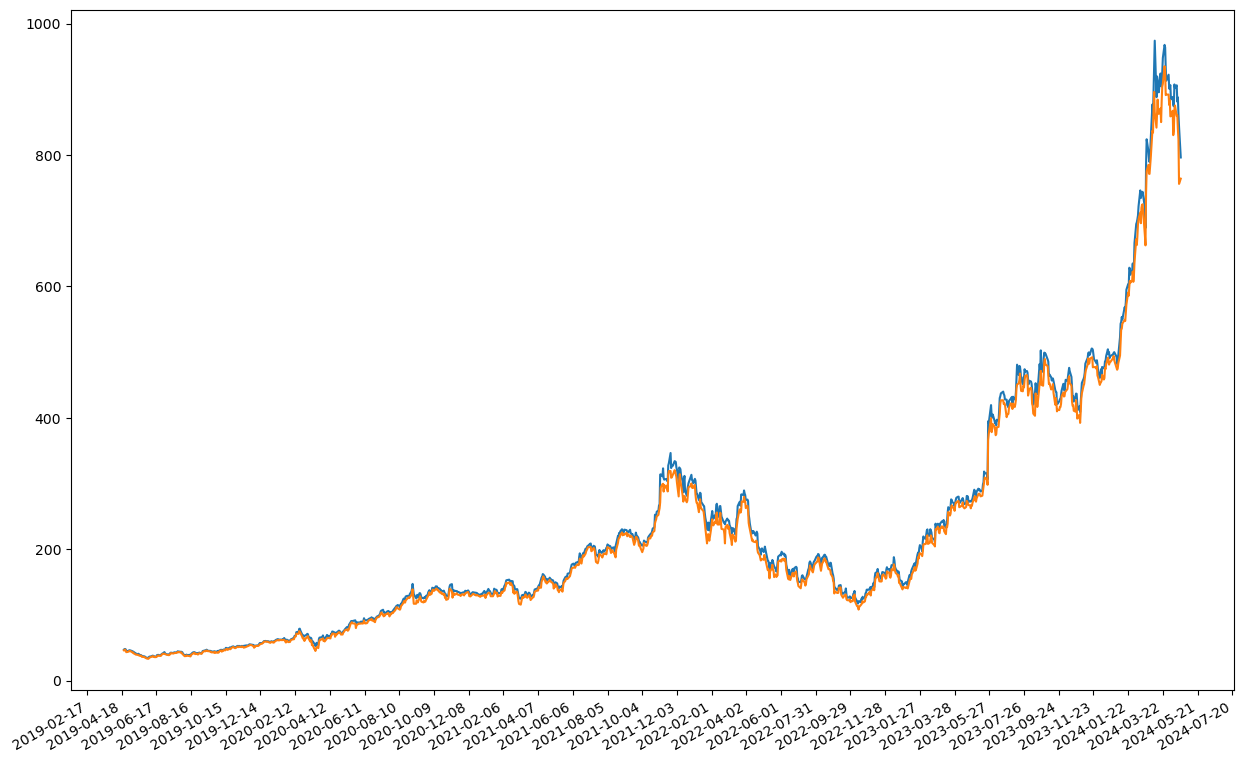

In [25]:
NVDA_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in NVDA_stock_data.index.values]
plt.figure(figsize=(15,10))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))

plt.plot(NVDA_dates,NVDA_stock_data['High'], label="High")
plt.plot(NVDA_dates,NVDA_stock_data['Low'], label="Low")
plt.gcf().autofmt_xdate()

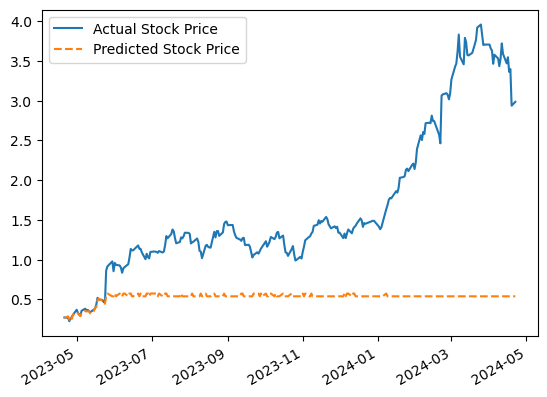

In [26]:
# Plot actual test data (y_test)
plt.plot(NVDA_dates[-len(y_test):], y_test, label="Actual Stock Price")

# Plot predicted test data (y_pred)
plt.plot(NVDA_dates[-len(y_pred):], y_pred, label="Predicted Stock Price", linestyle='--')

# Customize the plot
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [27]:
len(NVDA_dates[len(y_test)+1:])
len(y_test)
print(y_pred.shape)
print(y_pred)

(252, 1)
[[0.26626071]
 [0.28753878]
 [0.24599587]
 [0.28073557]
 [0.25620068]
 [0.30492663]
 [0.33720563]
 [0.3240335 ]
 [0.3068446 ]
 [0.28949286]
 [0.32385256]
 [0.35497354]
 [0.3514091 ]
 [0.3514091 ]
 [0.3514091 ]
 [0.3240335 ]
 [0.35497354]
 [0.39863331]
 [0.40527362]
 [0.49197815]
 [0.50885944]
 [0.48325703]
 [0.45389118]
 [0.44623752]
 [0.53970903]
 [0.57482868]
 [0.53970903]
 [0.53970903]
 [0.57482868]
 [0.53970903]
 [0.57482868]
 [0.53970903]
 [0.53970903]
 [0.57482868]
 [0.57482868]
 [0.53970903]
 [0.57482868]
 [0.57482868]
 [0.53970903]
 [0.53970903]
 [0.57482868]
 [0.53970903]
 [0.57482868]
 [0.53970903]
 [0.53970903]
 [0.57482868]
 [0.57482868]
 [0.53970903]
 [0.57482868]
 [0.57482868]
 [0.57482868]
 [0.53970903]
 [0.57482868]
 [0.53970903]
 [0.53970903]
 [0.57482868]
 [0.57482868]
 [0.53970903]
 [0.53970903]
 [0.53970903]
 [0.53970903]
 [0.53970903]
 [0.53970903]
 [0.53970903]
 [0.57482868]
 [0.53970903]
 [0.53970903]
 [0.53970903]
 [0.53970903]
 [0.53970903]
 [0.5397090

In [28]:
predictions_y = scaler.inverse_transform(y_pred)
test_y = scaler.inverse_transform(y_test)

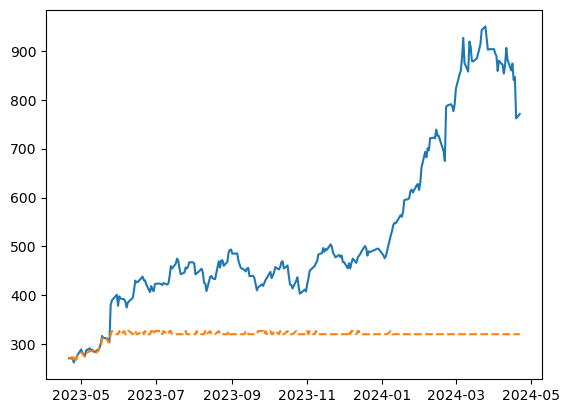

In [29]:
plt.plot(NVDA_dates[-len(test_y):], test_y, label="Actual Stock Price")
plt.plot(NVDA_dates[-len(y_pred):], predictions_y, label="Predicted Stock Price", linestyle='--')


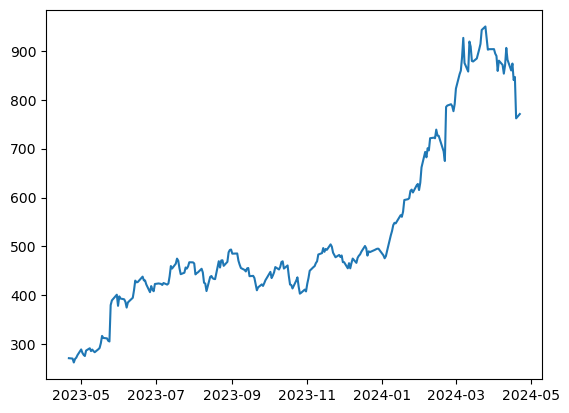

In [30]:
plt.plot(NVDA_dates[-len(y_pred):], NVDA_stock_data['Close'][-len(y_pred)::], label="")



In [31]:
# Calculate the index that divides the data into training and testing sets
split_index = int(len(X_scaled) * 0.5)

# Split the data based on the calculated index
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

In [32]:
# Create the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [33]:
# Make predictions on the test data
y_pred = knn.predict(X_test)


In [34]:
predictions_y = scaler.inverse_transform(y_pred)
test_y = scaler.inverse_transform(y_test)

In [35]:
predictions_y

array([[222.75      ],
       [222.53333533],
       [224.31667067],
       [225.97000133],
       [225.97000133],
       [227.30999767],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [227.30999767],
       [225.97000133],
       [225.97000133],
       [225.006668  ],
       [227.30999767],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.006668  ],
       [225.97000133],
       [225.97000133],
       [225.006668  ],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.006668  ],
       [225.006668  ],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.97000133],
       [225.006668  ],
       [225.97000133],
       [227.30999767],
       [225.006668  ],
       [225.97000133],
       [225

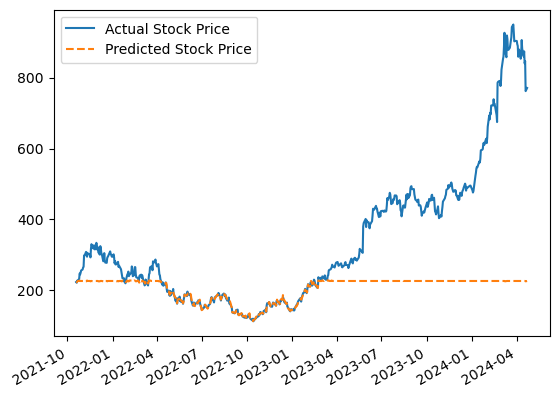

In [36]:
# Plot actual test data (y_test)
plt.plot(NVDA_dates[-len(test_y):], test_y, label="Actual Stock Price")

# Plot predicted test data (y_pred)
plt.plot(NVDA_dates[-len(predictions_y):], predictions_y, label="Predicted Stock Price", linestyle='--')

# Customize the plot
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

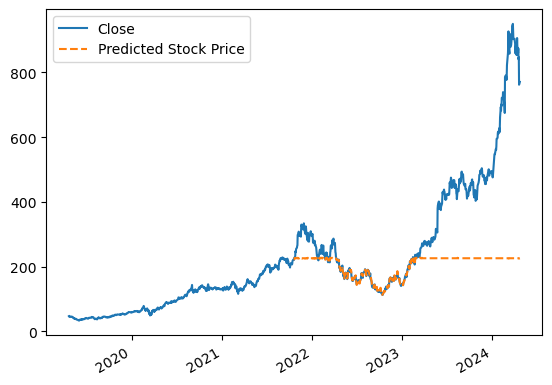

In [38]:

plt.plot(NVDA_dates,NVDA_stock_data['Close'], label="Close")
# Plot predicted test data (y_pred)
plt.plot(NVDA_dates[-len(predictions_y):], predictions_y, label="Predicted Stock Price", linestyle='--')

# Customize the plot
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [39]:
# Calculate the index that divides the data into training and testing sets
split_index = int(len(X_scaled) * 0.3)

# Split the data based on the calculated index
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

In [40]:
# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
# Make predictions on the test data
y_pred = knn.predict(X_test)


In [42]:
predictions_y = scaler.inverse_transform(y_pred)
test_y = scaler.inverse_transform(y_test)

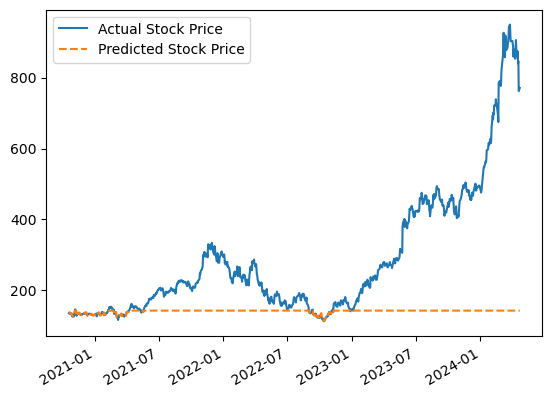

In [43]:
# Plot actual test data (y_test)
plt.plot(NVDA_dates[-len(test_y):], test_y, label="Actual Stock Price")

# Plot predicted test data (y_pred)
plt.plot(NVDA_dates[-len(predictions_y):], predictions_y, label="Predicted Stock Price", linestyle='--')

# Customize the plot
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

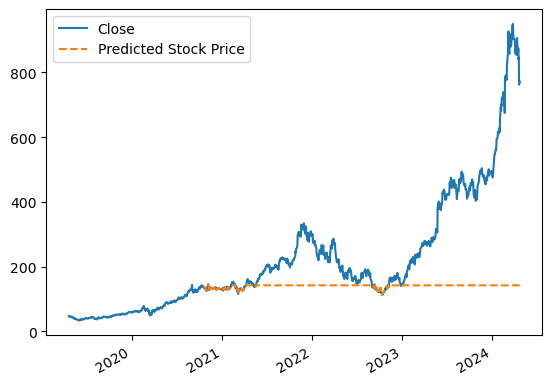

In [44]:

plt.plot(NVDA_dates,NVDA_stock_data['Close'], label="Close")
# Plot predicted test data (y_pred)
plt.plot(NVDA_dates[-len(predictions_y):], predictions_y, label="Predicted Stock Price", linestyle='--')

# Customize the plot
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [45]:
# Calculate the index that divides the data into training and testing sets
split_index = int(len(X_scaled) * .85)

# Split the data based on the calculated index
X_train, X_test = X_scaled[split_index-200:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[split_index-200:split_index], y_scaled[split_index:]

In [46]:
# Create the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [47]:
# Make predictions on the test data
y_pred = knn.predict(X_test)


In [48]:
predictions_y = scaler.inverse_transform(y_pred)
test_y = scaler.inverse_transform(y_test)

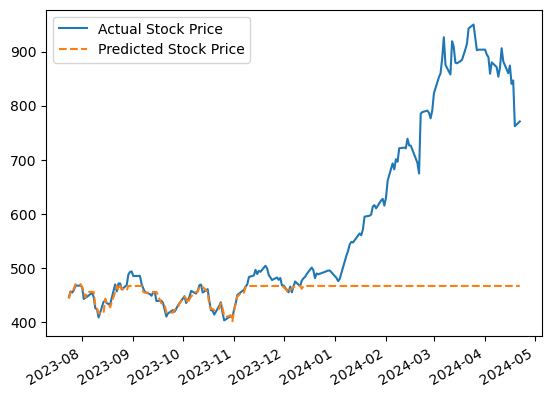

In [49]:
# Plot actual test data (y_test)
plt.plot(NVDA_dates[-len(test_y):], test_y, label="Actual Stock Price")

# Plot predicted test data (y_pred)
plt.plot(NVDA_dates[-len(predictions_y):], predictions_y, label="Predicted Stock Price", linestyle='--')

# Customize the plot
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

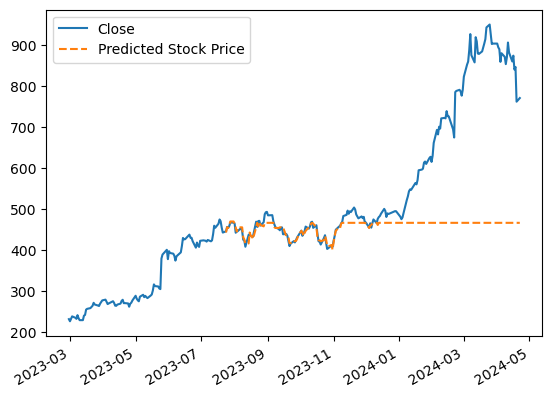

In [52]:
plt.plot(NVDA_dates[-(len(predictions_y)+100):],NVDA_stock_data['Close'][-(len(predictions_y)+100):], label="Close")
# Plot predicted test data (y_pred)
plt.plot(NVDA_dates[-len(predictions_y):], predictions_y, label="Predicted Stock Price", linestyle='--')

# Customize the plot
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()